In [6]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import datetime
pd.core.common.is_list_like = pd.api.types.is_list_like
# yf.pdr_override()
import altair as alt
import matplotlib.pyplot as plt
# alt.renderers.enable("default")
alt.data_transformers.enable('vegafusion')
alt.data_transformers.enable('default')
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [22]:
start = datetime.datetime(2007, 1, 1)
end = datetime.datetime(2025,2,10)

tickers = ['MSFT', 'QCOM', 'AMD', 'ADBE', ]

df = yf.download(tickers, start, end)['Close']

[*********************100%***********************]  4 of 4 completed


In [69]:
df.to_csv('data.csv', index=True)

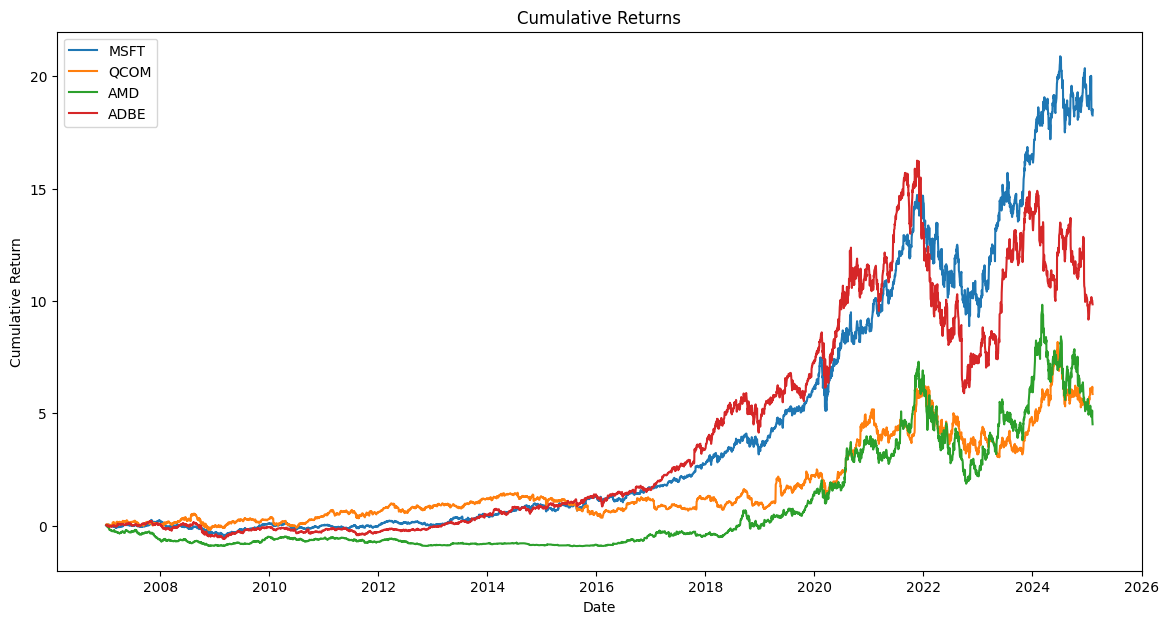

In [23]:
# Calculate cumulative returns
cumulative_returns = df.pct_change().add(1).cumprod().sub(1)

# Plot cumulative returns using matplotlib
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(cumulative_returns[ticker], label=ticker)
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


In [47]:
# Plot cumulative returns using Altair

cumulative_returns_reset = cumulative_returns.reset_index().melt('Date', var_name='Ticker', value_name='Cumulative Return')

cumulative_returns_reset['Cumulative Return'] = cumulative_returns_reset['Cumulative Return'] / 100
chart =alt.Chart(cumulative_returns_reset).mark_line().encode(
    x='Date:T',
    y=alt.Y('Cumulative Return:Q', axis=alt.Axis(format='%')),
    color='Ticker:N'
).properties(
    width=800,
    height=500  # Increase the width of the plot
).configure_axis(
    labelFontSize=15,
    titleFontSize=17
).configure_legend(
    labelFontSize=15,
    titleFontSize=17
).interactive()

chart


alt.Chart(...)

In [49]:
chart.save('Project Report #1/plots/cumulative_returns.png')

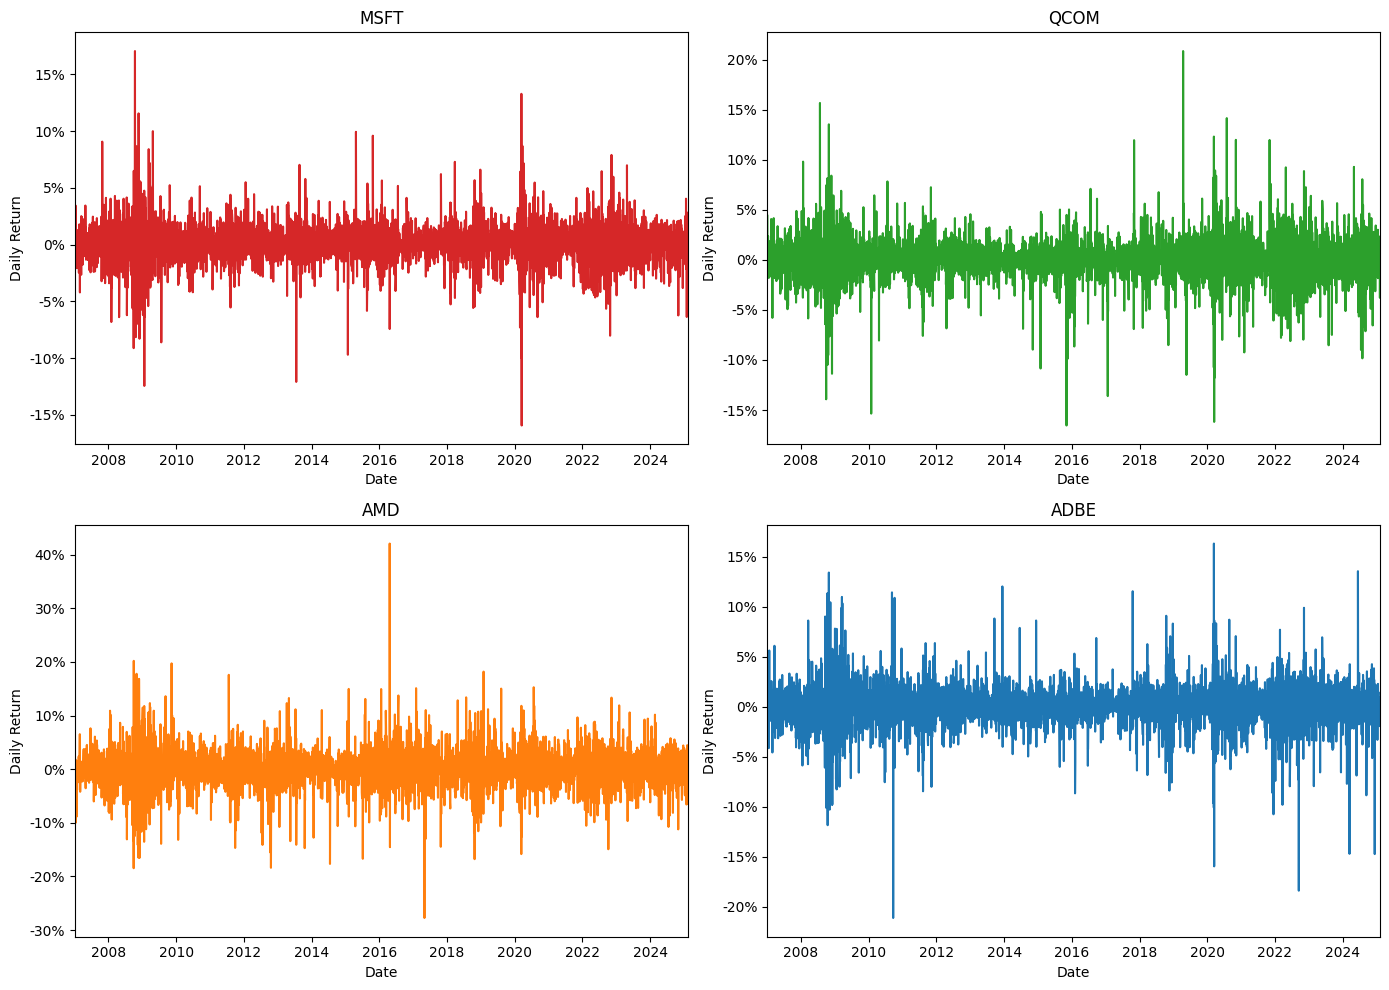

<Figure size 640x480 with 0 Axes>

In [66]:
# Calculate daily returns
daily_returns = np.log(df / df.shift(1))
# Create subplots for each ticker using Altair
# Create subplots for each ticker using matplotlib
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Flatten the axs array for easy iteration
axs = axs.flatten()

colors = ['#d62728',  '#2ca02c','#ff7f0e','#1f77b4' ]
for i, ticker in enumerate(tickers):
    axs[i].plot(daily_returns.index, daily_returns[ticker], label=ticker, color=colors[i])
    axs[i].set_xlim([datetime.datetime(2007, 1, 4), datetime.datetime(2025, 2, 7)])
    axs[i].set_title(f'{ticker}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Daily Return')
    axs[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

# Adjust layout
plt.tight_layout()
plt.show()
plt.savefig('Project Report #1/plots/daily_returns.png')


In [67]:
daily_returns

Ticker,ADBE,AMD,MSFT,QCOM
Date,,,,
2007-01-03,NaN,NaN,NaN,NaN
2007-01-04,0.022295,0.013737,-0.001676,0.044127
2007-01-05,-0.004912,-0.004051,-0.005719,-0.011819
2007-01-08,-0.004194,-0.012251,0.009736,-0.011177
2007-01-09,-0.020480,0.009203,0.001002,-0.011038
...,...,...,...,...
2025-02-03,0.002625,-0.014595,-0.010025,-0.015678
2025-02-04,0.003709,0.044752,0.003522,0.016314
2025-02-05,-0.005924,-0.064728,0.002229,0.016165


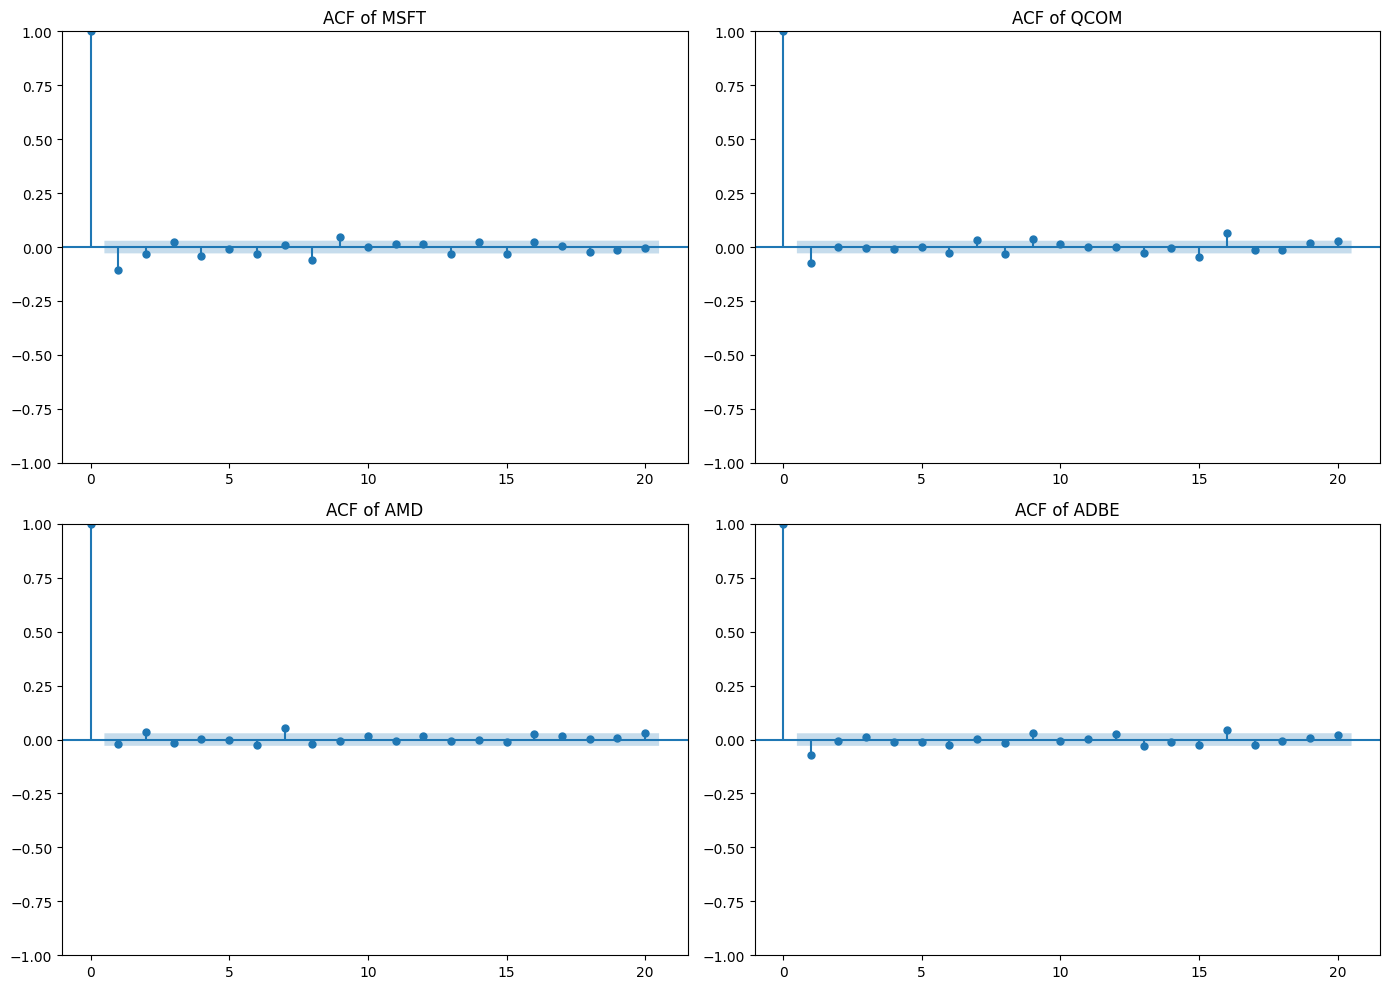

<Figure size 640x480 with 0 Axes>

In [68]:
from statsmodels.graphics.tsaplots import plot_acf

